In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

# Análise Exploratória de Dados (EDA) da tabelas.

### Faço uma análise de cada tabela para entender melhor como são constituídas e se algum campo precisa de tratamento.

## Análise da Tabela de Idade e Gênero

In [2]:
dados = pd.read_json("../dados/Tabela_idade_e_genero.json")

### Como os dados da Tabela estão no padrão pt_BR, com a ',' como separador decimal, o python entende os valor como String, e não como Float.

Por isso faço o processo de localização para serem entendidos como Float pelo python

In [3]:
def convert(value):
    if not value:
        return np.nan
    return locale.atof(value)

In [4]:
dados['Quantia gasta (BRL)'] = dados['Quantia gasta (BRL)'].map(convert)

dados['Cliques no link'] = dados['Cliques no link'].map(convert)

dados['Visualizações por página'] = dados['Visualizações por página'].map(convert)

dados['Compras no website'] = dados['Compras no website'].map(convert)

dados['Compras no facebook'] = dados['Compras no facebook'].map(convert)

dados['Adicionados ao carrinho'] = dados['Adicionados ao carrinho'].map(convert)

dados['Valor de conversão adicionado ao carrinho'] = dados['Valor de conversão adicionado ao carrinho'].map(convert)

dados['Checkouts Iniciados'] = dados['Checkouts Iniciados'].map(convert)

dados['Valor de conversão de checkouts iniciados'] = dados['Valor de conversão de checkouts iniciados'].map(convert)

dados['Valor de conversão de compras'] = dados['Valor de conversão de compras'].map(convert)

dados['Compras'] = dados['Compras'].map(convert)

In [5]:
dados.head()

,Idade,Gênero,Dia,FIELD4,Alcance,Impressões,Quantia gasta (BRL),Cliques no link,Visualizações por página,Compras no website,Compras no facebook,Adicionados ao carrinho,Valor de conversão adicionado ao carrinho,Checkouts Iniciados,Valor de conversão de checkouts iniciados,Valor de conversão de compras,Compras
0,45-54,Feminino,2021-07-31,,1116.0,1489.0,9.42,24.0,20.0,NaN,NaN,1.0,63.9,1.0,NaN,NaN,NaN
1,35-44,Outros,2021-07-31,,4.0,5.0,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45-54,Outros,2021-07-31,,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65+,Masculino,2021-07-31,,24.0,36.0,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25,Outros,2021-07-31,,4.0,4.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Vejo que há vários campos com valores nulos. Os que mais chamas a atenção são 'Compras no facebook' e 'Valor de conversão de checkouts iniciados', pelo fato de terem somente valores nulos.

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Idade                                      511 non-null    object 
 1   Gênero                                     511 non-null    object 
 2   Dia                                        511 non-null    object 
 3   FIELD4                                     511 non-null    object 
 4   Alcance                                    447 non-null    float64
 5   Impressões                                 508 non-null    float64
 6   Quantia gasta (BRL)                        452 non-null    float64
 7   Cliques no link                            322 non-null    float64
 8   Visualizações por página                   309 non-null    float64
 9   Compras no website                         125 non-null    float64
 10  Compras no facebook       

### Olhando o resumo das duas colunas vejo que os valores máximos parecem bem altos em relação ao resto dos dados.

In [7]:
dados.describe()

,Alcance,Impressões,Quantia gasta (BRL),Cliques no link,Visualizações por página,Compras no website,Compras no facebook,Adicionados ao carrinho,Valor de conversão adicionado ao carrinho,Checkouts Iniciados,Valor de conversão de checkouts iniciados,Valor de conversão de compras,Compras
count,447.000000,508.000000,452.000000,322.000000,309.000000,125.000000,0.0,208.000000,208.000000,208.000000,0.0,125.000000,125.000000
mean,1236.029083,1444.561024,6.914668,27.736025,23.388350,2.360000,NaN,16.048077,1623.470240,9.975962,NaN,265.633360,2.360000
std,2034.054527,2644.020394,11.260500,43.936678,36.676517,2.269716,NaN,20.337909,2179.140524,12.333310,NaN,281.691278,2.269716
min,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,NaN,1.000000,19.900000,1.000000,NaN,29.900000,1.000000
25%,38.000000,8.000000,0.280000,4.000000,3.000000,1.000000,NaN,4.000000,256.750000,2.000000,NaN,99.800000,1.000000
50%,324.000000,264.500000,2.140000,10.500000,9.000000,2.000000,NaN,9.000000,782.700000,6.000000,NaN,169.600000,2.000000
75%,1406.000000,1540.750000,7.412500,31.500000,26.000000,2.000000,NaN,20.000000,2168.735000,11.250000,NaN,298.500000,2.000000
max,11824.000000,16005.000000,72.100000,292.000000,238.000000,12.000000,NaN,148.000000,16904.900000,80.000000,NaN,1914.300000,12.000000


### Fazendo o Boxplot dos campos vejo que há muitos outliers neles.

In [8]:
def plot_boxplot(data, x):
    ax = sns.boxplot(x = x, data = data, orient = 'h')
    ax.figure.set_size_inches(18, 2)
    ax.set_title(x, fontsize = 18)
    ax.set_xlabel(x, fontsize = 14)
    plt.show()

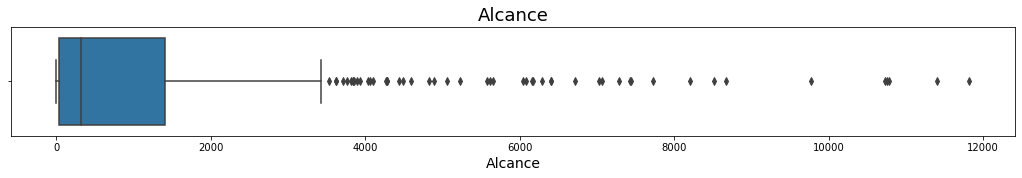

In [9]:
plot_boxplot(dados, 'Alcance')

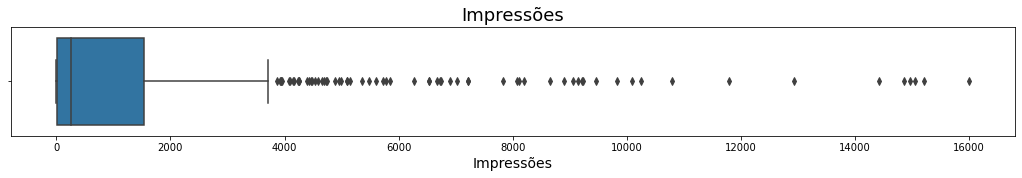

In [10]:
plot_boxplot(dados, 'Impressões')

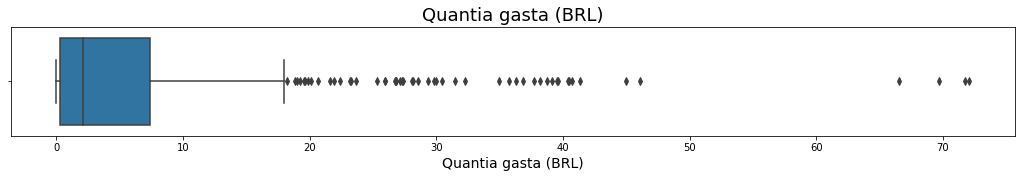

In [11]:
plot_boxplot(dados, 'Quantia gasta (BRL)')

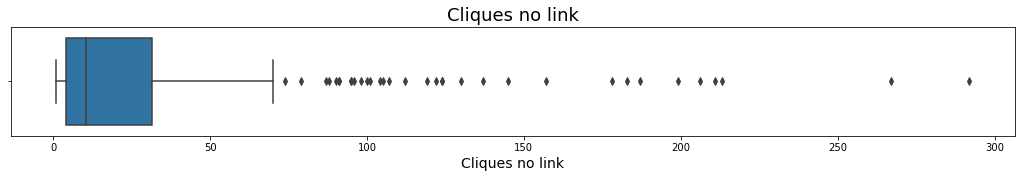

In [12]:
plot_boxplot(dados, 'Cliques no link')

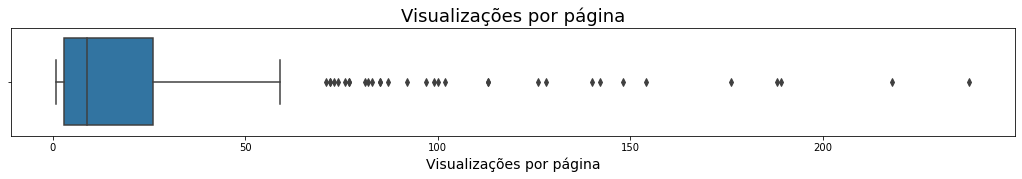

In [13]:
plot_boxplot(dados, 'Visualizações por página')

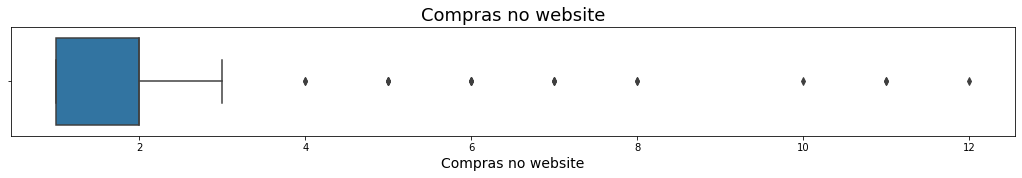

In [14]:
plot_boxplot(dados, 'Compras no website')

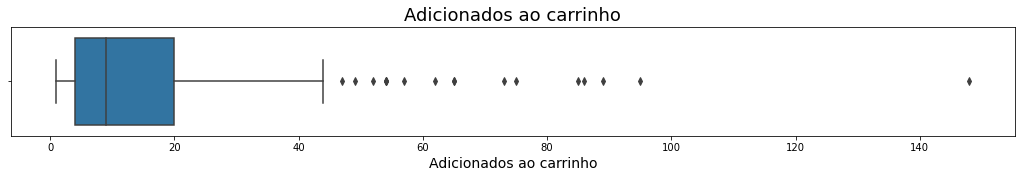

In [15]:
plot_boxplot(dados, 'Adicionados ao carrinho')

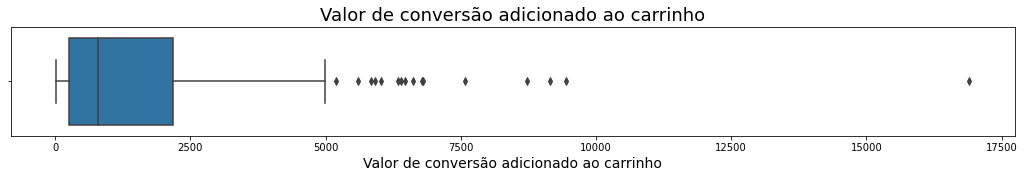

In [16]:
plot_boxplot(dados, 'Valor de conversão adicionado ao carrinho')

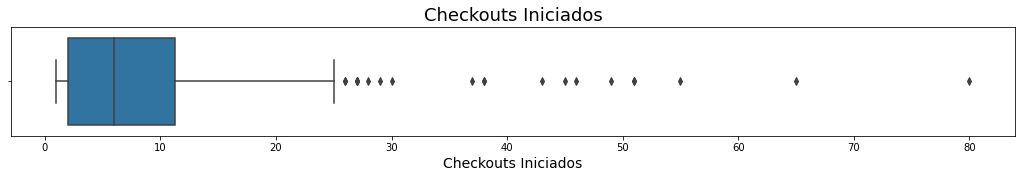

In [17]:
plot_boxplot(dados, 'Checkouts Iniciados')

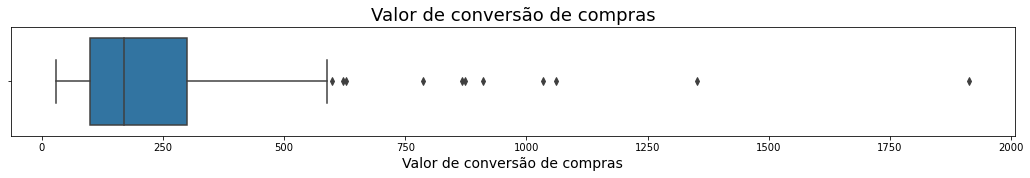

In [18]:
plot_boxplot(dados, 'Valor de conversão de compras')

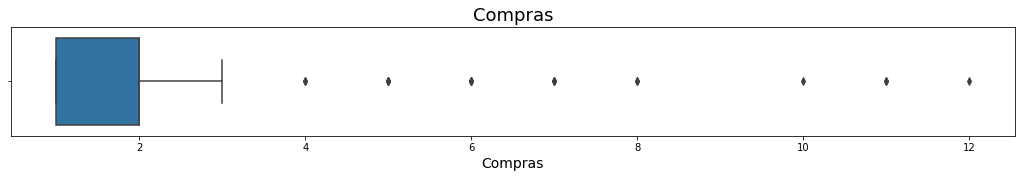

In [19]:
plot_boxplot(dados, 'Compras')